In [52]:
#importing libraries and setting the device agnoistic code

import torch
import torchvision
from torch import nn
from torchvision import transforms, datasets


device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [53]:
#getting the data

import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'


#if the image folder doesn't exist, download it and prepare it.
if image_path.is_dir():
  print(f'{image_path} directory already exists... skipping download')
else:
  print(f'{image_path} does not exist, creating one...')
  image_path.mkdir(parents= True, exist_ok = True)

#download the data
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('downloading pizza, steak and sushi data...')
  f.write(request.content)

#unzipping the zip file
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
  print('Unzipping pizza, steak and sushi data...')
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
downloading pizza, steak and sushi data...
Unzipping pizza, steak and sushi data...


In [54]:
import os
def walk_through_dir(dir_path):
  #walks through dir path and returns its contents
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


In [55]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak


In [56]:
#setup the training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

In [57]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image path: data/pizza_steak_sushi/train/sushi/2813454.jpg
image class: sushi
image height: 512
image width: 512


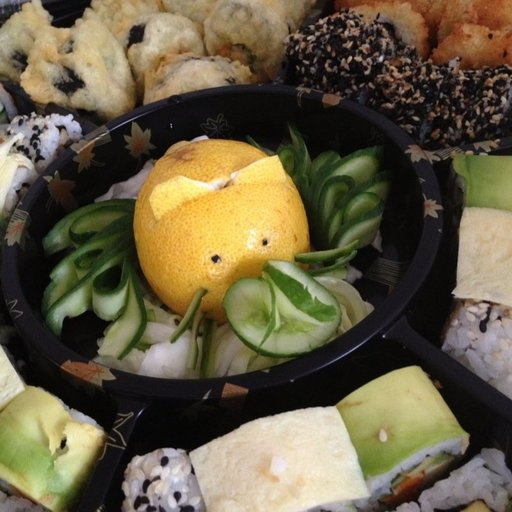

In [58]:
import random
from PIL import Image


#set seed
#random.seed(42)

#1. get every single image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))


#2. selecting a random image and visualising it.
random_image_path = random.choice(image_path_list)
random_image_path


#3. get the image class from the path name
image_class = random_image_path.parent.stem
image_class


#4. open image
img = Image.open(random_image_path)
img


#5. print metadata
print(f'random image path: {random_image_path}')
print(f'image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img


#Transforming the data

Transforms helps you get your images ready for the model or to perform data augmentation


Before we can use the image data with PyTorch:

1. Turn your target into tensors
2. Turn it into a 'torch.utils.data.Dataset' and subsequently a 'torch.utils.data.DataLoader'

In [59]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [60]:
#write a transform for image
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),  #resize our image to 64x64
    transforms.RandomHorizontalFlip(p=0.5), #flip the images randomly on the horizontal
    transforms.ToTensor()   #turn the image into a torch.tensor
])

In [61]:
data_transform(img)

tensor([[[0.3412, 0.2784, 0.3647,  ..., 0.5843, 0.6157, 0.6627],
         [0.2078, 0.2667, 0.5294,  ..., 0.5725, 0.6157, 0.6471],
         [0.2549, 0.5647, 0.7176,  ..., 0.5137, 0.5412, 0.5882],
         ...,
         [0.2824, 0.3059, 0.4627,  ..., 0.4549, 0.4510, 0.3843],
         [0.4078, 0.3922, 0.3961,  ..., 0.4667, 0.4627, 0.3373],
         [0.4784, 0.4549, 0.4000,  ..., 0.3765, 0.4157, 0.2941]],

        [[0.3451, 0.2863, 0.3373,  ..., 0.3020, 0.3373, 0.4157],
         [0.2039, 0.2510, 0.4706,  ..., 0.2941, 0.3490, 0.4196],
         [0.2353, 0.5294, 0.6627,  ..., 0.2392, 0.2745, 0.3529],
         ...,
         [0.2588, 0.2510, 0.3765,  ..., 0.4196, 0.4314, 0.3608],
         [0.3804, 0.3451, 0.3216,  ..., 0.4275, 0.4353, 0.3098],
         [0.4588, 0.4157, 0.3529,  ..., 0.3255, 0.3686, 0.2588]],

        [[0.3843, 0.3216, 0.3294,  ..., 0.1451, 0.1647, 0.2157],
         [0.2118, 0.2275, 0.3765,  ..., 0.1451, 0.1765, 0.2157],
         [0.1922, 0.4118, 0.4980,  ..., 0.1176, 0.1333, 0.

In [62]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [63]:
data_transform(img).dtype

torch.float32

In [64]:
image_path_list

[PosixPath('data/pizza_steak_sushi/test/sushi/1434806.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3806282.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1987407.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/988559.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/499605.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/887831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1245193.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2190404.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg'),
 PosixPath('data/pizza_steak_

we want some random image path and run it through data_transform and then compare it with the original image

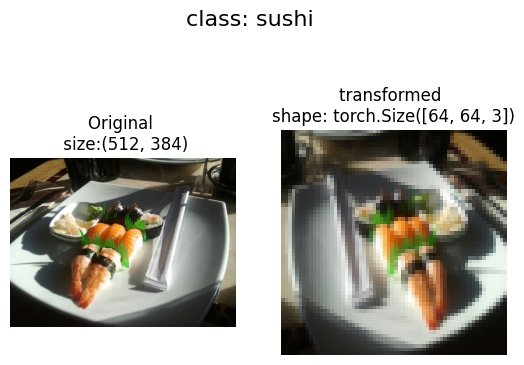

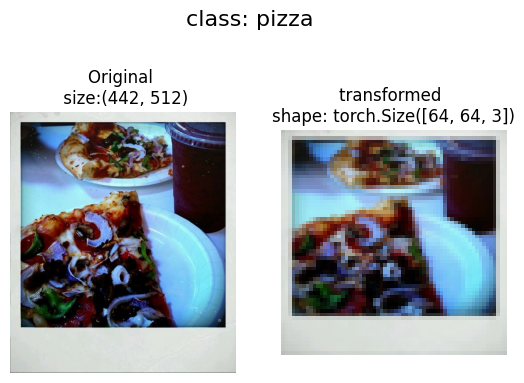

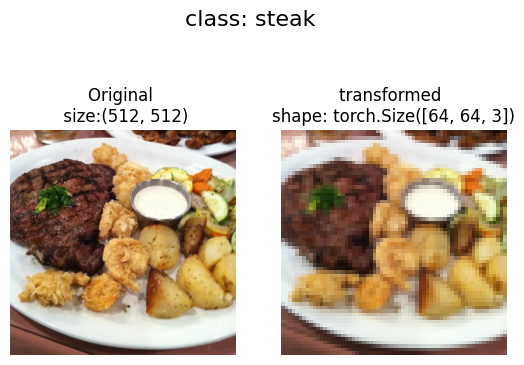

In [65]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):  #n --> number of images to transform
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols= 2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original \n size:{f.size}')
      ax[0].axis(False)

      #transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) #c,h,w --> h,w,c
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'transformed \nshape: {transformed_image.shape}')
      ax[1].axis('off')

      fig.suptitle(f'class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_paths= image_path_list,
                        transform = data_transform,
                        n=3,
                        seed=0)


#What's happening here:

We resized the images using the transform and it is more pixalated now because it is 64x64 now.

The transformed image has less information encoded but it helps the model to learn the patterns faster but we might lose some performance.

Another thing about these transformed images is that they are in their tensor format

#Option 1: Loading image data using inbuilt function - ImageFolder


we can load image classification data using torchvision.datasets.ImageFolder

In [66]:
#use ImageFolder to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None) #because we already had the data in three separate folders.

test_data = datasets.ImageFolder(root = test_dir,
                                  transform = data_transform,
                                  )
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [67]:
train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [68]:
#get class names
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [69]:
#get class names as a dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [70]:
#check the lengths of the dataset
len(train_data) , len(test_data)

(225, 75)

In [71]:
train_data.samples[10]

('data/pizza_steak_sushi/train/pizza/1572608.jpg', 0)

In [72]:
#Index on the train data dataset to get a single image label
train_data[0] #gives us an image tensor and its associated label -->0
#so we can say this is the image of a pizza

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

breaking it further into image and label

In [73]:
img, label = train_data[0][0] , train_data[0][1]
print(f'image tensor:\n{img}')
print(f'image shape:{img.shape}')
print(f'image datatype:{img.dtype}')
print(f'label: {label}')
print(f'label dtype: {type(label)}')

image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

In [74]:
class_names[label]

'pizza'

#visualizing using matplotlib

original shape:torch.Size([3, 64, 64]) --> [color_channels, height, width]
image permuted:torch.Size([64, 64, 3]) --> [height, width , color_channels]


Text(0.5, 1.0, 'pizza')

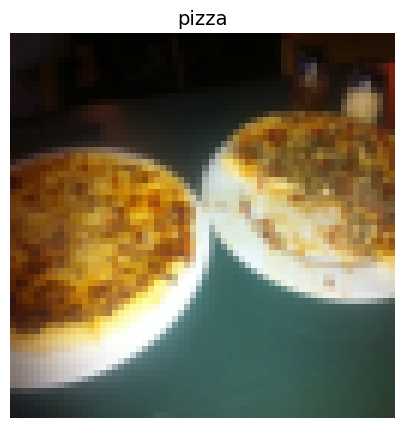

In [75]:
#rearrange the order dimensions --> because matplotlib takes color channels last
img_permute = img.permute(1,2,0)

#printing out different shapes
print(f'original shape:{img.shape} --> [color_channels, height, width]')
print(f'image permuted:{img_permute.shape} --> [height, width , color_channels]')

#plot the image
plt.figure(figsize=(5,5))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label] , fontsize=14)

#Turn loaded images(dataset) into dataloader



In [76]:
import os
os.cpu_count()

#turn train and test datasets into dataloader
from torch.utils.data import DataLoader
batch_size=1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=batch_size,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=batch_size,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78ec645ea6b0>,
 <torch.utils.data.dataloader.DataLoader at 0x78ec67c2bbb0>)

In [77]:
len(train_dataloader) , len(test_dataloader)

(225, 75)

In [78]:
img, label = next(iter(train_dataloader))

print(f'image shape:{img.shape} --> [batch_size, color_channels, height, width]')
print(f'label shape:{label.shape}')

image shape:torch.Size([1, 3, 64, 64]) --> [batch_size, color_channels, height, width]
label shape:torch.Size([1])


#Option 2 : Loading image data with a custom dataset by creating our own function

we want to -
1. to load images from files
2. to get the class names from the dataset


In [79]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [80]:
#using the ImageFolder, we already have
train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})


we want this same output but without the inbuilt function


In [81]:
#setup path for target directory
target_directory = train_dir
print(f'target dir: {target_directory}')

#get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found



target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [82]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [83]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  '''find the class folder names in the target directory'''
  #1. get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"couldn't find any classes in {directory}..please check" )

  #3. create a dictionary of the index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [84]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#To create a custom dataset from scratch without using inbuilt ImageFolder

load images path --> transform --> list of the target classes --> a dict of target classes --> visualize

In [85]:
#write a custom dataset class
from torch.utils.data import Dataset

#subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  #Initialise our custom dataset
  def __init__(self,
               target_dir: str,
               transform = None):
    #create class attributes
    #get all the image paths
    self.paths = list(pathlib.Path(target_dir).glob('*/*.jpg'))
    #setup the transforms
    self.transform = transform
    # create classes and class_to_idx attributes
    self.classes , self.class_to_idx = find_classes(target_dir)

  # create a function to load the images
  def load_image(self, index: int)-> Image.Image:
    '''opens an image via path and returns it'''
    image_path = self.paths[index]
    return Image.open(image_path)

  # overwrite __len__()
  def __len__(self) -> int:
    '''returns the total number of samples'''
    return len(self.paths)

  # overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index:int) -> Tuple[torch.Tensor , int]:
    '''returns one sample of data, data and label (x,y)'''
    img = self.load_image(index)
    class_name = self.paths[index].parent.name #expects a path
    class_idx = self.class_to_idx[class_name]

    #transform if necessary
    if self.transform:
      return self.transform(img) , class_idx #return data, label(x,y)
    else:
      return img, class_idx

In [86]:
# create a transform
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [87]:
#test out ImageFolderCustom
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transform)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                      transform = test_transform)

train_data_custom , test_data_custom

(<__main__.ImageFolderCustom at 0x78ec67b21900>,
 <__main__.ImageFolderCustom at 0x78ec67b229e0>)

In [88]:
len(train_data) , len(train_data_custom)

(225, 225)

In [89]:
len(test_data) , len(test_data_custom)

(75, 75)

In [90]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [91]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [92]:
#check for quality between original ImageFolder and ImageFolderCustom
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [93]:
#create a function to display random images

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int=10,
                          display_shape:bool = True,
                          seed: int = None):
  if n>10:
    n=10
    display_shape = False
    print(f"For display, n shouldn't be larger than 10, setting to 10 and removing shape display")

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16,8))

  for i , target_sample in enumerate(random_samples_idx):
    targ_image , targ_label = dataset[target_sample][0] , dataset[target_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f'class: {classes[targ_label]}'
      if display_shape:
        title = title + f'\nshape: {targ_image_adjust.shape}'
    plt.title(title)


For display, n shouldn't be larger than 10, setting to 10 and removing shape display


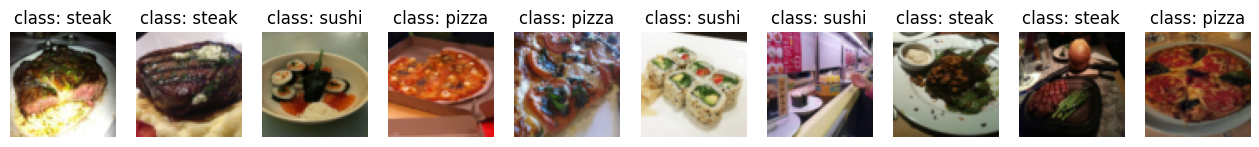

In [94]:
#display random images from the ImageFolder

display_random_images(train_data,
                      n=20,
                      classes=class_names,
                      seed=None)


For display, n shouldn't be larger than 10, setting to 10 and removing shape display


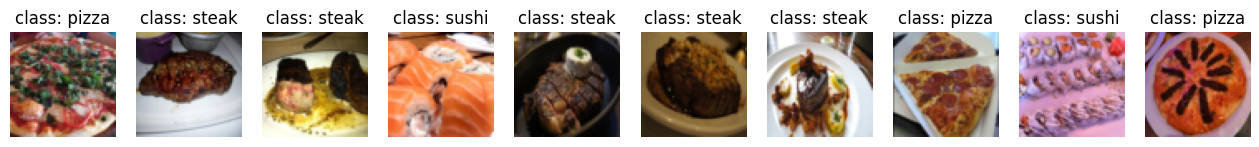

In [95]:
#display random images from the ImageFolder

display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=None)


In [96]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x78ec63f52410>,
 <torch.utils.data.dataloader.DataLoader at 0x78ec64074400>)

In [97]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])
